In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import preprocessing


In [2]:
csv = 'Crash_Data.csv'
col_Names=["Crash ID","Date","Day of Weeky", "Time","Lane Count","Median Type", "Crash Type", "Functional Class", 
           "Speed Limit","Environmental Conditions","Light Conditions", "Severity", "Surface Condition", "Total Vehicles Involved","Curve Related","Alcohol Involved","Distracted Driving Involved"
           ,"Drugged Driver Involved","Older Driver Involved"]
my_df1 = pd.read_csv(csv,index_col=False)
my_df1.head()


,Crash ID,Date,Day of Week,Time,Lane Count,Crash Type,Functional Class,Speed Limit,Environmental Conditions,Light Conditions,...,Total Vehicles Involved,Curve Related,Alcohol Involved,Distracted Driving Involved,Drugged Driver Involved,Older Driver Involved,Temp Traffic Control Zone,Traffic Controls Present,Vehicle Type,Severity
0,9969918,4,1,2,3,3,2,4,1,4,...,2,2,2,2,2,1,1,1,1,3
1,9741036,4,1,1,3,1,2,4,1,4,...,2,1,2,1,2,2,1,1,1,3
2,9965952,4,1,1,3,1,2,4,1,3,...,2,2,2,1,2,3,1,1,1,3
3,9705367,4,1,1,2,3,2,1,2,2,...,2,2,2,2,2,2,1,1,3,3
4,9741034,4,2,1,3,3,2,4,2,4,...,2,2,2,2,2,2,1,1,1,3


In [5]:
my_df = my_df1[6000:8000]

In [6]:
my_df['Severity'].isnull().sum()
len(my_df['Severity'])

2000

# **There is no missing value in the dataframe**

In [7]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=my_df["Severity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Severity,
1,6
2,66
3,1928


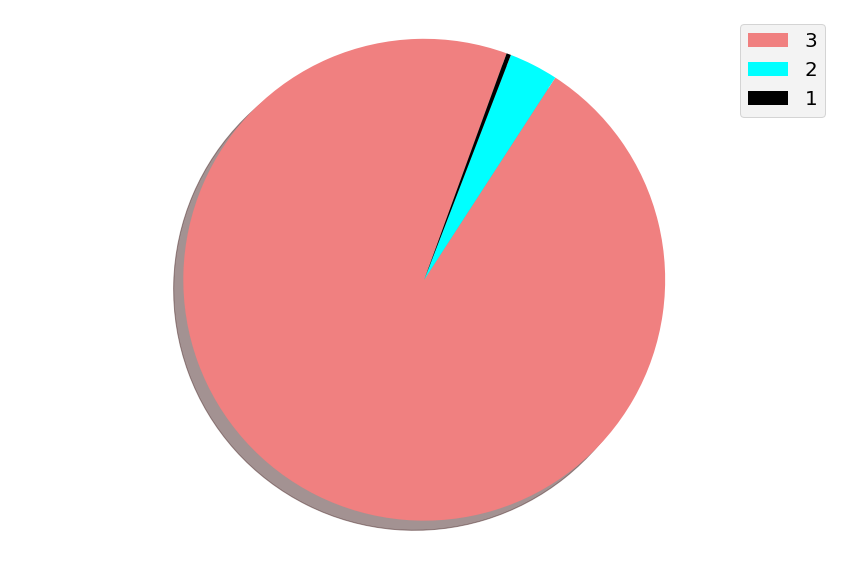

In [8]:
# Visualizing Outcome Distribution 
temp = my_df["Severity"].value_counts()
# print(temp.values)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df['labels']
sizes = df['values']
colors = ['lightcoral','cyan','black']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=70, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [26]:
X = my_df.iloc[:,1:-1].values
y = my_df.iloc[:,20].values


In [10]:
print(X.shape,y.shape)
print(y[0:10])

(2000, 19) (2000,)
[3 3 3 3 3 3 3 3 3 3]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

1600 1600 400 400


In [13]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print((X_train[0]))

[ 0.18734284  2.09890576 -0.60148091 -0.95618724 -0.93167916 -5.45611865
 -0.07809488  0.3790436  -0.5723614  -0.38548689  0.05044333  0.41802276
  0.16418781  0.88415903  0.07930516 -1.80260703  4.04867968 -0.28006509
  0.55059037]


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Hyperparameter tuning using grid search and cross validation

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'gamma': [1e-3, 1e-4],'degree':[3,4,5,6,7,8],
                     'C': [1, 10, 100, 1000]}
                    ]

clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                       scoring='accuracy')
clf.fit(X_train[0:1000], y_train[0:1000])

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print('Best score for training data:', clf.best_score_,"\n")
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()



Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best score for training data: 0.965 

Grid scores on development set:

0.957 (+/-0.006) for {'C': 1, 'kernel': 'linear'}
0.957 (+/-0.006) for {'C': 10, 'kernel': 'linear'}
0.957 (+/-0.006) for {'C': 100, 'kernel': 'linear'}
0.957 (+/-0.006) for {'C': 1000, 'kernel': 'linear'}
0.965 (+/-0.002) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.965 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.960 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.965 (+/-0.002) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.958 (+/-0.004) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.960 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.956 (+/-0.004) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.004) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.965 (+/-0.002) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
0.965 (+/-0.002) for {'C': 1, 'degree

In [15]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[  0,   0,   1],
       [  0,   0,  11],
       [  0,   0, 388]])

In [16]:
from pycm import *
cm = ConfusionMatrix(y_true, y_pred)
print(cm)

Predict   1         2         3         
Actual
1         0         0         1         

2         0         0         11        

3         0         0         388       





Overall Statistics : 

95% CI                                                            (0.95328,0.98672)
ACC Macro                                                         0.98
AUNP                                                              0.5
AUNU                                                              0.5
Bennett S                                                         0.955
CBA                                                               0.32333
CSI                                                               None
Chi-Squared                                                       None
Chi-Squared DF                                                    4
Conditional Entropy                                               -0.0
Cramer V                                                          None
Cross 

In [16]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf',C=1,gamma=.001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Testing accuracy for best combination ",accuracy)

Testing accuracy for best combination  0.97


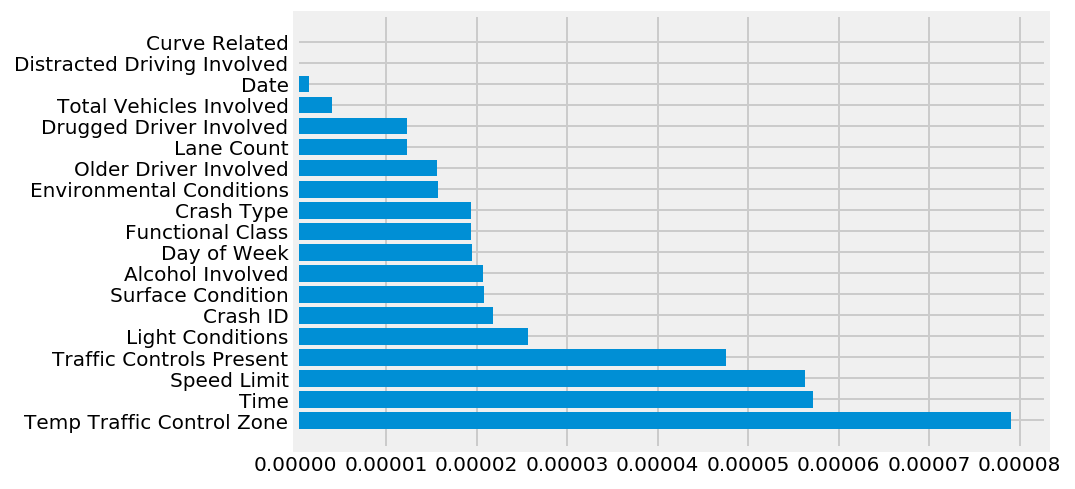

In [17]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    # Show all features
    if top == -1:
        top = len(names)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
linear_classifier = SVC(kernel = 'linear',C=1)
linear_classifier.fit(X_train,y_train)
features = list(my_df.columns)
f_importances(abs(linear_classifier.coef_[2]), features,top=-1)


In [24]:
list(my_df.columns)

['Crash ID',
 'Date',
 'Day of Week',
 'Time',
 'Lane Count',
 'Crash Type',
 'Functional Class',
 'Speed Limit',
 'Environmental Conditions',
 'Light Conditions',
 'Surface Condition',
 'Total Vehicles Involved',
 'Curve Related',
 'Alcohol Involved',
 'Distracted Driving Involved',
 'Drugged Driver Involved',
 'Older Driver Involved',
 'Temp Traffic Control Zone',
 'Traffic Controls Present',
 'Vehicle Type',
 'Severity']

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
svc =SVC(kernel='linear',C=1)
knn = KNeighborsClassifier(n_neighbors=5)
sfs1 = SFS(svc, 
           k_features=10,#best 3 features 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

feature_names = ('Date','Day of Week','Time','Lane Count','Crash Type','Functional Class','Speed Limit','Environmental Conditions',
 'Light Conditions','Surface Condition','Total Vehicles Involved','Curve Related','Alcohol Involved','Distracted Driving Involved',
 'Drugged Driver Involved','Older Driver Involved','Temp Traffic Control Zone','Traffic Controls Present','Vehicle Type')
sfs1 = sfs1.fit(X,y, custom_feature_names=feature_names)
#Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2019-12-20 10:35:25] Features: 1/10 -- score: 0.964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2019-12-20 10:35:25] Features: 2/10 -- score: 0.964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2019-12-20 10:35:25] Features: 3/10 -- score: 0.964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

{1: {'feature_idx': (0,),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date', 'Day of Week')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date', 'Day of Week', 'Time')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date', 'Day of Week', 'Time', 'Lane Count')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date',
   'Day of Week',
   'Time',
   'Lane Count',
   'Crash Type')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.964]),
  'avg_score': 0.964,
  'feature_names': ('Date',
   'Day of Week',
   'Time',
   'Lane Count',
   'Crash Type',
   'Functional Class')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.964]),
  'avg_

In [73]:
sfs1.k_feature_names_

('Date',
 'Day of Week',
 'Time',
 'Lane Count',
 'Crash Type',
 'Functional Class',
 'Speed Limit',
 'Environmental Conditions',
 'Light Conditions',
 'Surface Condition')

In [30]:
# Sequential Forward Selection
sfs = SFS(svc, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(svc, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(X_train, y_train)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(svc, 
           k_features=3, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X_train, y_train)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(svc, 
           k_features=3, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X_train, y_train)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(0, 1, 2)
CV Score:
0.964003856015424


/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F


Sequential Backward Selection (k=3):
(0, 1, 2)
CV Score:
0.9625030078312989

Sequential Forward Floating Selection (k=3):
(0, 1, 2)
CV Score:
0.9625030078312989


/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F


Sequential Backward Floating Selection (k=3):
(0, 1, 2)
CV Score:
0.9625030078312989


# Tree based

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/home/bjit-554/anaconda3/envs/nlp_jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

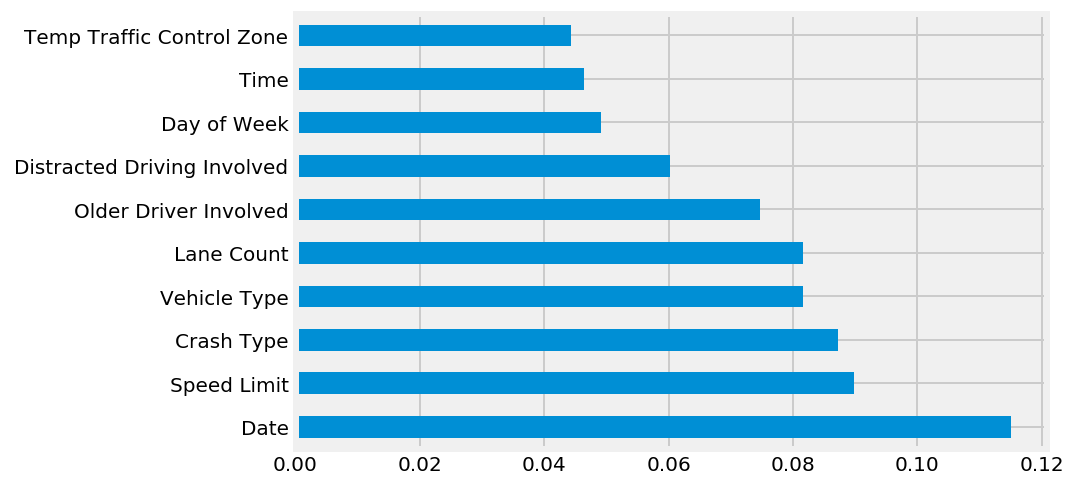

In [75]:
#plot graph of feature importances for better visualization
import pandas as pd
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Here we will use PCA

In [14]:

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pc = scaler.fit_transform(X)


In [78]:
#implementing PCA
from sklearn.decomposition import PCA
pca = PCA(.9)
X_transform = pca.fit_transform(X_pc)

In [79]:
#here to have 90% of information we need to take 15 PC that means 15D values
pca.n_components_

15

In [72]:
info_amount = 0
feature_hold = []
info_hold = []
for i in range(1,10):
    info_amount =i/10 
    pca_value = PCA(info_amount)
    X_info_transform = pca_value.fit_transform(X_pc)
    feature_hold.append(pca_value.n_components_)
    info_hold.append(info_amount)
feature_hold.append(19)
info_hold.append(1)
for i in range(0,len(info_hold)):
    info_hold[i]=info_hold[i]*100

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100] [1, 2, 3, 5, 6, 8, 10, 12, 15, 19]


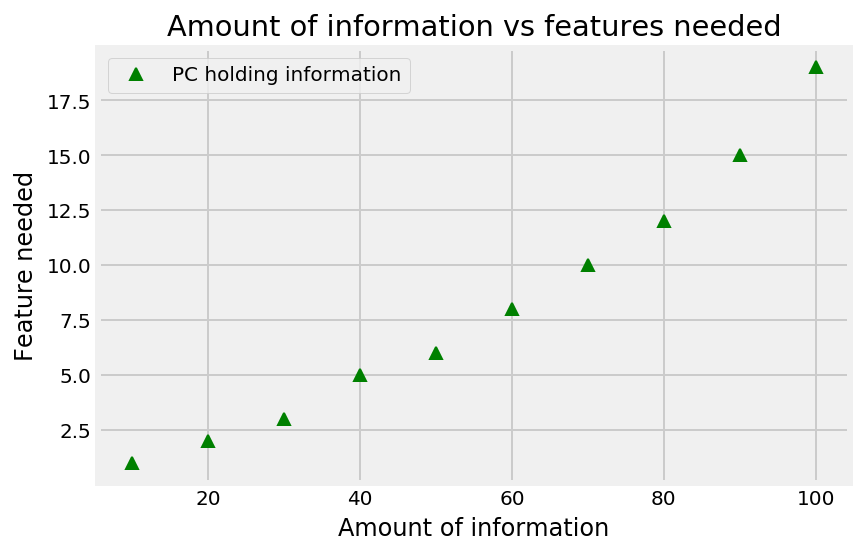

In [77]:
plt.plot(info_hold, feature_hold,'g^', label = "PC holding information")
plt.xlabel('Amount of information')
plt.ylabel('Feature needed')
plt.title('Amount of information vs features needed')
plt.legend() 
plt.show()


In [163]:
#this is the PC value for every data in a perticular dimention .
print(X_transform[0],X_transform.shape)
# print(pca.explained_variance_ratio_)


[-0.78660249 -0.04416728 -0.39468017 -0.3380364   0.37398982  0.34369462
 -0.02623166 -0.79028002  0.08900848  1.3319053  -0.30295115 -0.82813247
 -0.71916519 -0.34484004  1.36728889] (2000, 15)


In [164]:
#this is the array where we can see the variance of every PC. That means how much information every pc holds
print(pca.explained_variance_ratio_)

[0.11340466 0.10096723 0.08570522 0.07538573 0.06604652 0.06041844
 0.05623508 0.05538557 0.05216759 0.05061488 0.05010686 0.04723648
 0.0447513  0.0406921  0.03306896]


In [165]:
#this can give us the clear idea of features impact .
#pca.componensts_ provides the dimension value for every features in the reduced dimention 
pca.components_.shape

(15, 19)

# So we can say the significance of the Principle component num 1 to 11 (as they above 5%)

In [182]:
#implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_transform = pca.fit_transform(X_pc)
print(pca.explained_variance_ratio_)

[0.11340367 0.10095836]


In [171]:
pd.DataFrame(pca.components_,columns=my_df2.columns[1:20],index = ['PC-1','PC-2'])

,Date,Day of Week,Time,Lane Count,Crash Type,Functional Class,Speed Limit,Environmental Conditions,Light Conditions,Surface Condition,Total Vehicles Involved,Curve Related,Alcohol Involved,Distracted Driving Involved,Drugged Driver Involved,Older Driver Involved,Temp Traffic Control Zone,Traffic Controls Present,Vehicle Type
PC-1,-0.039990,0.124505,0.482675,0.014819,0.333495,-0.033175,0.110536,-0.282321,0.448827,0.298098,-0.341780,-0.089645,-0.304969,0.043877,-0.141463,0.095381,-0.077184,0.015875,-0.007388
PC-2,-0.020519,-0.055110,-0.365299,-0.303035,0.187437,-0.061417,-0.256056,-0.454196,-0.390958,0.449977,-0.228882,-0.151793,0.051187,-0.096506,-0.021889,-0.047055,0.071320,-0.045203,0.089407


# Here is the contribution of every features in the PC. By this we can find the most significant features


# How we will use this PC for train and test 


In [183]:
print(X_test.shape)

(400, 19)


In [184]:
pca = PCA(n_components = 15) 
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.11434735 0.10123576 0.08775116 0.07530874 0.06774872 0.06081814
 0.05569163 0.05454225 0.0527729  0.05063731 0.04908673 0.04712752
 0.04468464 0.04054422 0.03237529]


In [185]:
import warnings
warnings.filterwarnings('ignore')
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'gamma': [1e-3, 1e-4],'degree':[3,4,5,6,7,8],
                     'C': [1, 10, 100, 1000]}
                    ]

clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                       scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print('Best score for training data:', clf.best_score_,"\n")
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()


Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}
Best score for training data: 0.9625 

Grid scores on development set:

0.963 (+/-0.002) for {'C': 1, 'kernel': 'linear'}
0.963 (+/-0.002) for {'C': 10, 'kernel': 'linear'}
0.962 (+/-0.004) for {'C': 100, 'kernel': 'linear'}
0.960 (+/-0.007) for {'C': 1000, 'kernel': 'linear'}
0.963 (+/-0.002) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.001) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.961 (+/-0.004) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.002) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
0.963 (+/-0.002) for {'C': 1, 'degree': 3, 'gamma

In [130]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear',C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Testing accuracy for best combination ",accuracy)

Testing accuracy for best combination  0.97
